# 17 - Predictive Models 101


우리는 이제 인과 추론의 핵심을 다루었던 Part 1을 이제 막 마쳤는데요. 소개해드린 기술들은 매우 잘 알려져 있고, 또 잘 구축이 되어 있었습니다. 왜냐하면 그것들은 시간이라는 시험을 통과했기 때문이죠! 1부에선 우리가 참고할 수 있을만한 튼튼한 기반을 구축하였는데요. 좀 더 전문적으로 말해볼까요? 우리는 1부에서 인과추론(causal inference)이 무엇인지 정의하는 작업을 했습니다. 상관관계(correlation)가 인과관계(causation)가 되는 것을 막는 편향들(bias)엔 무엇이 있을지, 이러한 편향들을 조정하는 여러 가지 방법들(e.g. regression, matching, propensity score)과 표준 판별 전략들(instrumental variables, diff-in-diff, RDD)은 무엇이 있을지 등을 탐색하는 과정을 통해서요.한 마디로 1부에서는 평균적인 처치 효과 $E[Y_1 - Y_0]$ 를 확인하기 위한 표준 기술들에 집중하는 시간을 가졌었습니다.

2부로 넘어가면서, 우리는 다른 측면들 또한 살펴볼껀데요. 인과 추론 학문의 최신 동향, 인과추론(causal inference)과 머신러닝(machine learning)과의 관계, 또한 업계에서 어떻게 활용이 되는지를 확인할 예정인데요. 그런 의미에서 우리는 '적용 가능성'과 '경험 주의'를 위해 학문적 엄격함에 살짝 눈을 감을 겁니다. 2부에서 소개되는 몇몇 방법론들은 왜 그 방법론들이 그렇게 되는지에 대한 명확한 이론적 배경이 없을 수도 있습니다. 하지만 우리가 그 방법론들을 시도해볼 때, '그럼에도 불구하고' 어느 정도 작동하는 것처럼 보일 수도 있을 것입니다. 그런 의미에서 2부는 근본적인 인과 관계를 탐구하고자 하는 연구자들보단 실제 업무에서 인과 추론적 방법론을 사용하고자 하는 실무자에게 조금 더 적합한 챕터가 될 예정입니다.

2부의 초반 몇 개 챕터는 동질하지 않은 처치 효과를 추정하는 것에 대해 설명할 예정인데요. 이제 평균적인 처치 효과($ATE$)를 탐색하기 보다 $E[Y_1 - Y_0]$, 서로 다른 그룹이 다른 처치에 어떻게 반응하는지를 살펴볼 것입니다. $E[Y_1 - Y_0 | X]$ 현재 우리는 개인화(personalisation)가 매우 중요한 세상에서 살고 있습니다. 우리는 처치 효과가 가장 큰 집단을 우선적으로 처치 대상에 올려두고 싶을 것이고, 그 효과가 긍정적으로 나타나지 않는 집단엔 처치를 진행하고 싶지 않을텐데요. 그런 의미에서 평균적인 처치 효과란 무엇인지에 대한 긍정적인 질문으로부터 '어떤 집단에 처치를 가할 것인가'에 대한 규범적인 질문까지 확장되고 있습니다.

사실 이 질문은 기업에서 끊임 없이 탐구하는 주제기도 한데요: 우리는 누구에게 할인을 제공해야하는 걸까?, 대출 이자율을 얼마나 부과해야하는 걸까?, 어떤 사용자에게 어떤 아이템을 추천해야하는 걸까?, 어떤 고객에게 어떤 페이지 레이아웃을 보여주어야 하는 걸까? 이런 주제들은 2부에서 이야기할 동질하지 않은 처치에 대한 효과(Heterogeneous Treatment Effects)에 대한 이야기가 될 것입니다. 하지만 이 것들을 공부하기 전에 업계에서 머신러닝이 의미하는 바를 확인해볼 예정인데요. 왜냐하면 머신러닝 기법이 인과 관계 추론의 기본적인 도구로써 기능할 것이기 때문입니다.

## Machine Learning in the Industry

이번 챕터에서는 우리가 산업에서 보통 어떻게 머신러닝 모델을 활용하고 있는지 확인해볼텐데요. 만약 머신러닝에 익숙하지 않은 분들이라면, 이 챕터를 통해 머신러닝에 대해 어느 정도 알게 될 것 같습니다. 다만 머신러닝에 대해 한번도 다뤄본 적이 없다면, 앞으로 나올 내용들을 최대한 이해할 수 있도록 기본적인 내용을 배우는 것을 강력히 추천합니다. 하지만 여러분이 머신러닝에 대해 이미 잘 알고 있다 하더라도 이 장을 굳이 스킵할 필욘 없습니다. 읽는 것만으로 충분히 도움을 줄 수 있을 거라 생각하거든요. 이번 챕터에서는 머신러닝에 관련한 다른 자료들과 다르게 의사결정 트리(decision trees)와 신경망 알고리즘(neural networks)의 인풋과 아웃풋 등에 관련한 것들에 대해 자세히 설명하기 보단, 머신러닝 기술이 어떻게 현실 세계에 적용되고 있는지에 대해 더 집중할 예정이라서요!

![ml-meme](./data/img/industry-ml/ml-meme.png)

가장 먼저 설명하고 싶은 내용은 우리는 지금 인과추론과 관련한 내용을 말하고 있는데 왜 머신러닝을 논해야하는지에 대한 것인데요. 간단하게 대답 먼저 해보자면 인과관계(causality)를 이해하는 가장 좋은 방법 중 하나가 바로 머신러닝의 예측 모델 접근 방식과 비교해보는 것이기 때문입니다. 이제 길게 대답을 해보겠습니다. 첫 번째로, 여러분이 만약 이 챕터까지 왔다면 이미 머신러닝에 익숙할 것이기 때문이고, 두 번째로, 설령 여러분이 머신러닝에 익숙하지 않다 할지라도 이미 머신러닝 토픽은 너~무 유명하기 때문에 머신러닝에 대한 어느 정도 인식은 있을 것이기 때문이죠. 아마 유일한 문제는 머신러닝에 대해 하도 여기 저기서 많이 언급하기 때문에 다시 기본으로 돌아와서 머신러닝이 실제로 어떤 것을 하는지 실질적인 용어로 설명을 해야한다는 것이겠죠. 마지막으로, 인과 추론의 최근 발전은 머신러닝 알고리즘을 깊게 사용하기 때문입니다.

직접적으로 말해보자면, **머신러닝을 통해 빠르고, 자동화되어 있으며 아주 좋은 예측**을 할 수 있습니다. 물론 이것이 전부는 아니지만, 90% 정도는 커버할 수 있죠. 컴퓨터 비전(computer vision), 자율 주행(self-driving cars), 번역기(language translation), 의료 진단(diagnostics)과 같은 대부분의 엄청난 발전이 이루어진 분야가 바로 지도 학습(supervised learning) 분야인데요. 근데 처음에는 이것들이 '예측'처럼 보이지 않는단 말이에요? 번역기가 어떻게 예측 작업이 될 수 있는 걸까요? 바로 이 질문이 머신러닝의 아름다움이죠. 우리는 생각보다 많은 문제를 예측 작업을 통해 해결할 수 있습니다. 번역기와 같은 케이스를 살펴본다면, 기계에 한 문장을 제시하고, 다른 언어로 같은 문장을 예측해야하는 예측 작업(prediction)으로 프레임을 만들어 볼 수 있겠죠. 미래를 예상하거나 예측하고자 할 때, 예측(prediction)이라는 단어를 사용하지 않을 건데요. 예측(prediction)은 단순히 하나의 정의된 인풋값에서 최초에는 알려지지 않았지만 인풋과 동등하면서도 관찰 가능한 아웃풋으로 잘 맵핑하는 것이기 때문이죠.

![translation](./data/img/industry-ml/translation.png)

머신러닝이 실제로 하는 것은 설령 그것이 아주 복잡한 맵핑 함수라 할지라도, 일종의 맵핑 함수를 학습하는 것인데요. 핵심은 만약 인풋에서 아웃풋으로 가는 맵핑의 문제를 잘 정의할 수 있다면, 머신러닝은 문제를 해결할 수 있는 좋은 후보가 될 수도 있다는 것입니다. 자율주행을 예로 들어 생각해보자면, 이것을 하나가 아니라 여러 개의 복잡한 예측 문제로 정의하여 풀어갈 수 있을 것인데요: 자동차 앞의 센서로부터 바퀴의 정확한 각도를 예측하고, 자동차 주변의 카메라로부터 브레이크의 압력을 예측하며, GPS 데이터로부터 엑셀의 압력의 예측할 수 있을 것입니다. 이러한 예측 문제들을 해결하는 것이 바로 자율주행 차를 만드는 일인 것이죠.

머신러닝에 대한 기술적인 사고는 (아마 아주 복잡할 것인) 예상 함수를 추정하는 일일 것입니다:

$E[Y|X]$

$Y$에는 우리가 알고 싶은 것(번역된 문장, 진단 결과 등)이 들어갈테고, $X$에는 이미 우리가 알고 있는 것(인풋 문장, x-ray 이미지 등)이 들어가겠죠. 머신러닝은 단순히 조건부 예상 함수를 추정하는 과정일 것입니다.

좋습니다. 우리는 이제 예측이 우리가 당초 생각했던 것보다 훨씬 강력할 수 있다는 걸 이해했습니다. 하지만 자율주행 차와 번역기는 매우 있어보이지만 사실 우리가 구글(Goolge)이나 우버(Uber)같은 메이저 IT 회사에 다니지 않는 한 살짝 멀게 느껴지는 이야기기도 하죠. 따라서 우리에게 좀 더 친숙하게 풀어보자면, 모든 회사들이 가지고 있는 신규 모객(customer acquisition)과 같은 문제들로 접근해봅시다.

신규 고객을 확보해야하는 관점에서 우리가 자주 해야하는 것 중 하나는 어떤 고객이 이득이 될까를 판단하는 건데요. 이러한 문제에서 각 고객은 획득하기 위한 비용이 있고(마케팅 비용, 온보딩 비용, 배송비 등), 회사를 위한 긍정적인 현금 흐름을 만들어내길 바라게 됩니다. 예를 들어, 우리가 인터넷 회사나 가스 회사라고 가정해봅시다. 우리의 전형적인 고객은 아래 이미지와 같은 현금 흐름을 가지고 있을 것입니다.

![cashflow-1](./data/img/industry-ml/cashflow-1.png)

각각의 막대들은 고객과의 관계에서 발생하는 금전적인 사건들을 가리킵니다. 예를 들어, 신규 고객을 확보하기 위해서는 즉시 판단하여 마케팅에 투자할 필요가 있는 건데요. 그런 다음 누군가가 여러분의 비즈니스에 참여한다면 일종의 온보딩 비용(고객에게 어떻게 제품을 사용하는지에 대한)이나 설치 비용이 발생할 수 있는데요. 이런 일련의 과정을 거쳐야지만 고객들은 월별 이익을 창출하기 시작합니다. 또 어떤 시점에서 고객은 약간의 지원이 필요할 수도 있으며 이때 유지 보수 비용이 발생하는데요. 마지막으로는 고객이 우리의 비즈니스를 더이상 사용하지 않는다면 이에 대한 최종 비용 또한 발생할 수 있습니다.

우리가 어떤 고객이 수익성이 있는지를 판단하기 위해서 각각의 막대들을 재배열할 수도 있는데요. (cascade plot; 계단식 플롯) 현금 이벤트의 합이 결국 0보다 위에 위치하길 바라겠죠.

![cascade-1](./data/img/industry-ml/cascade-1.png)

반대로, 고객들은 우리가 기대한 이익보다 훨씬 더 많은 비용을 유발할 수도 있는데요. 고객이 우리의 제품(서비스)을 거의 사용하지 않고 유저 보수 요구만 높다면 우리는 현금 이벤트만 쌓게 되어 결국 우리의 막대는 0 아래로 떨어지게 될 것입니다.

![cascade-2](./data/img/industry-ml/cascade-2.png)

물론 이러한 현금 흐름은 우리가 하는 비즈니스가 어떤 타입이냐에 따라 더 간단해질 수도, 더 복잡해질 수도 있습니다. 우리는 이자율을 활용하여 시간 할인과 같은 것들을 시도하고 여기에 더 몰입할 수도 있겠지만, 핵심은 여기서 만들어지게 될 것 같습니다.

우리가 과연 여기서 무엇을 할 수 있을까요? 우리에게 이익이 되는 고객과 이익이 되지 않는 고객들에 대한 많은 사례들이 있다면 우리는 그들을 특정(identify)하기 위해 머신러닝 모델을 학습시킬 수도 있을 것입니다. 이런 방식으로 우리는 수익성 있는 고객들만이 참여할 수 있는 마케팅 전략을 수립할 수 있겠죠? 아니면 만약 가능하다면, 고객들이 더 많은 비용을 유발하기 전에 그들과의 관계를 끝낼 수도 있을 것입니니다. 특히 이 지점에서 우리가 할 수 있는 것은 **비즈니스 이슈를 예측의 주제로 구성하여 머신러닝을 활용**하는 것입니다: 수익성이 없는 고객을 예측 혹은 특정하여 수익성이 있는 고객에게만 어떠한 처치를 진행하는 것이죠.

In [2]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("ggplot")

예를 들어 우리에게 1만명 고객의 30일치 트랜잭션 데이터가 있다고 가정해봅시다. 또한 CACQ(cost of acquisition) 획득 비용에 대해 알고 있다고 해봅시다. 이것은 온라인 마케팅을 수행하는 경우 입찰 비용이 될 수도 있고 배송 비용이 될 수도 있으며 고객이 제품을 사용할 수 있게끔 하는 일종의 초기 정착 비용이 될 수 있겠죠. 또한 좀 더 간단하게 하기 위해, (고객 가치 평가에 대한 한 학기 수업이 아닌 특강이기 때문에!) 우리가 우리 비즈니스의 고객들을 완전히 통제할 수 있도록 가정해보겠습니다. 즉, 고객이 우리 비즈니스에 참여하고 싶다 할지라도 우리는 이를 거절할 수 있는 권한이 있다고 가정해보는 것이죠. 이제 우리는 누가 수익성이 있는 고객인지를 미리 파악하여 그들과만 관계를 맺을 수 있도록 선택할 수 있겠습니다.

In [4]:
transactions = pd.read_csv("./data/customer_transactions.csv")
print(transactions.shape)
transactions.head()

(10000, 32)


,customer_id,cacq,day_0,day_1,day_2,day_3,day_4,day_5,day_6,day_7,...,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29
0,0,-110,6,0,73,10,0,0,0,21,...,0,0,0,0,0,0,0,0,0,0
1,1,-58,0,0,0,15,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,-30,0,3,2,0,9,0,0,0,...,0,0,40,0,0,0,0,0,0,0
4,4,-42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


이제 우리가 해야할 일은, 위 트랜잭션 데이터를 기반으로 어떤 고객이 좋은 고객이고 어떤 고객이 안좋은 고객인지 판별하는 건데요. 또 단순화를 위해서 모든 트랜잭션과 CACQ를 일괄적으로 합산해보겠습니다. 다만 이러한 단순화는 첫 구매와 그 다음 구매 사이에서 이탈한 고객들을 구별하는 것과 같은 사이 과정의 많은 것들을 생략한다는 것을 명심하세요.

그런 다음 `net_value`라고 하는 고객들의 특정 특징들과 위 합계를 결합해보겠습니다. 우리가 지금 하고자 하는 것이 고객들이 서비스에 들어오기 전에 어떤 고객이 우리에게 이득이 될지를 알아보는 것이기 때문에 우리는 신규 모객 이전 기간의 데이터만 이용할 수 있습니다. 이러한 경우에는 다른 `csv`에서 확인할 수 있는 연령, 지역, 수입 피처들(features)이 되겠습니다.

In [5]:
profitable = (transactions[["customer_id"]]
              .assign(net_value = transactions
                      .drop(columns="customer_id")
                      .sum(axis=1)))

customer_features = (pd.read_csv("./data/customer_features.csv")
                     .merge(profitable, on="customer_id"))

customer_features.head()

,customer_id,region,income,age,net_value
0,0,30,1025,24,130
1,1,41,1649,26,10
2,2,18,2034,33,-6
3,3,20,1859,35,136
4,4,1,1243,26,-8


좋습니다. 이제 우리의 작업이 좀 더 구체화되었군요. 우리의 목표는 수익성이 없는 고객들로부터 수익성이 있는 고객들(`net_value > 0`)을 찾아내는(identify) 것입니다. 이제 다른 방법들을 시도해보고 어떤 것이 나은지 봅시다. 일단 그 전에, 머신러닝이 무엇인지에 대해 빠르게 살펴볼까요? (이미 머신러닝에 대해 잘 알고 있다면 넘어가도 좋습니다.)

## Machine Learning Crash Course

우리의 의도와 목적을 위해서라면 머신러닝(ML)은 예측을 진행하는 엄청난 수단이 될 수 있는데요. 이를 위해서는 라벨링이 되어 있는 데이터, 예측하고자 하는 실측치가 필요합니다. 그러고 나서, 데이터를 기반으로 머신러닝 모델을 훈련시키고 아직 알지 못하는 부분에 대한 예측을 진행시킬 수 있습니다. 아래 이미지는 일반적인 머신러닝 플로우를 보여줍니다.

![ml-flow](./data/img/industry-ml/ml-flow.png)

첫 번째로 우리는 정답지가 필요합니다. (우리의 사례에서는 `net_value`가 되겠네요) 그리고 아직 모르는 `net_value`를 예측하기 위해 지역, 수입, 나이 등의 피처들을 이용하여 머신러닝 모델을 훈련시킵니다. 이러한 과정은 우리에게 아직 실제 `net_value`가 없을 때 `net_value`에 대한 예측을 진행하는 머신러닝 모델을 생성하는 단계입니다. 이는 이미지의 좌측 부분에서 보여지고 있네요. 우리에겐 지역, 수입, 나이와 같은 새로운 데이터를 기반으로 한 피처들이 있지만, 아직 `net_value`는 없습니다. 따라서 생성한 모델에게 이러한 데이터를 넣고 훈련시킨다면 이 모델은 `net_value` 예측치를 제공하는 것입니다.

좀 더 기술적으로 서술하자면, 머신러닝 모델을 이해하는 또다른 방법은 $x$라는 피처 변수들과 $Y$라는 타겟, 혹은 결과 변수를 통해 조건부 기대 값($E[Y|X]$)을 측정한다는 측면에서입니다. 머신러닝(ML)은 몇몇 에러와 손실 함수를 최적화함으로써 $\hat{E}[Y|X]$를 얻는 강력한 방법이라는 것이죠.

머신러닝 모델의 까다로운 점 중 하나는 거의 모든 함수를 추정할 수 있다는 것인데요. 다르게 말해보자면 훈련 데이터(training data set)로부터 너무 완벽하게 피팅될 수 있다는 것이죠. 머신러닝 모델에는 우리가 흔히 복잡성 하이퍼파라미터(complexity hyperparameters)라고 부르는 것이 있는데요. 복잡성 하이퍼파라미터는 모델이 얼마나 복잡할지를 조정합니다. 아래 이미지를 보면, 가장 심플한 모델(좌측), 중간 레벨의 모델(중앙), 아주 복잡한 모델(오측)이 있습니다. 복잡한 모델이 훈련 데이터와 어떻게 피팅되는지를 유념해두세요.

![model-fit](./data/img/industry-ml/model-fit.png)

복잡한 모델은 때론 문제를 유발하기도 하는데요. 실제 세계에서 예측 작업을 진행하기 위해 모델을 사용하기 전에 우리의 모델이 좋은지 아닌지를 어떻게 알 수 있을까요? 한 가지 방법은 우리가 실제 정답지를 가지고 있는 데이터 셋과 예측치를 비교하는 것일테지요. $R^2$ (결정 계수 R-Squared)라고 흔히 불리는 모델의 설명력을 알려주는 하나의 메트릭이죠. 하지만 모델이 데이터와 완벽하게 피팅되어 아주 강력할 수 있다는 것을 생각해보세요. 이 경우에 예측은 실측과 완벽하게 일치할 텐데요. 우리는 우리의 모델을 복잡하게 만들수록 유효성 테스트를 통과할 수 있기 때문에 유효성 테스트(validation)가 좋은 지표가 아닐 수도 있음을 의미하기에 문제가 있는 방법이 되는 것이죠.

그리고 일반적으로도 복잡한 모델을 만드는 것은 별로 좋은 방법이 아닙니다. 그리고 우리는 이미 왜 안되는지 직관적으로 알고 있기도 합니다. 예를 들어 아래 이미지를 살펴봅시다. 어떤 모델을 만들고 싶으신가요? 모든 예측을 정확하게 수행하는 복잡한 모델일까요? 아마 아닐겁니다. 아마 가운데 모델을 선호하겠죠. 이 모델의 경우 정확하게 데이터에 핏하진 않을지라도 더 스무스하고 단순/간단하지만 비교적 좋은 예측을 수행할 것입니다.

![overfitting](./data/img/industry-ml/overfitting.jpg)

좋습니다. 우리의 직감은 올바르군요. 모델을 너무 복잡하게 훈련시킬 경우 어떻게 될까요? 모델은 데이터의 패턴을 학습할 뿐만 아니라 데이터의 노이즈까지 학습하게 되겠죠. 실제 세계에서 랜덤으로 발생할 노이즈는 매번 다를 것이기 때문에 우리의 "완벽한" 모델은 실수를 하게 되겠죠. 이를 머신러닝 용어로 표현해볼까요? 우리는 너무 복잡한 모델은 과적합(오버피팅; overfitting)되었으며 일반화되지 않는다고 합니다. 그래서 이제 우리는 뭘 할 수 있을까요?

우리는 이제 일부 데이터에 접근할 수 없는 척할 건데요. 실측치가 있는 데이터를 둘로 나누고, 모델이 훈련할 부분과 모델 예측을 검증하는 데 사용할 수 있는 다른 부분을 마련할 것이죠. 이를 교차 유효성 검증(cross validation)이라고 합니다.

![test](./data/img/industry-ml/test.png)

훈련 중에 모델이 학습하지 못한 위 데이터 셋에서 복잡한 모델은 그다지 잘 작동하지 않습니다. 반면에 중간에 있는 모델은 성능이 더 좋은 것 같죠. 모델의 복잡도를 올바르게 선택하기 위해서는 각각 다른 복잡도를 가진 서로 다른 모델을 훈련시킨 후, 테스트 셋(우리가 실측 정보를 가지고 있지만 모델 교육에 사용되지 않은 일부 데이터)에서 모델이 어떻게 수행되는지 확인함으로써 할 수 있습니다. 이러한 교차 유효성 검사(cross validation)는 매우 중요하므로 많은 시간을 투자해야 합니다.

## Cross Validation 

교차 유효성 검증(cross validation)은 모델의 복잡도를 선택하는데 필수적이지만 그 이상으로 아주 유용한데요. 우리가 다양한 것들을 시도하고 그것들이 실제 세계에서 어떻게 적용될지 확인하고 싶을때마다 활용될 수 있기 때문이죠. 교차 유효성 검증은 우리가 가진 데이터로 모델을 추정하고 확인할 수 없는 새로운 데이터에 대한 예측을 한다는 측면에서 실제 세계를 모방할 수 있습니다. 우리가 가지고 있지 않은 척하는 데이터는 우리가 실제 사회에서 마주하게 될 것들에 대한 대리자의 역할(proxy)을 하는 것이죠.

어떤 고객이 수익성이 있을지 판단하는 작업에서 교차 유효성 검사를 적용해봅시다. 개요는 아래와 같습니다.

1. 기존 고객에 대한 데이터를 기반으로 어떤 고객이 수익성이 있는지 없는지 알 수 있습니다. 이걸 훈련 셋(training-set)이라고 불러봅시다.
2. 훈련 데이터를 통해 어떤 고객이 수익성이 있는지 판별하는 규칙을 학습해봅시다. 
3. 학습에 사용되지 않은 데이터에 우리가 학습한 규칙을 적용해봅시다. 하나의 데이터 셋에서 규칙을 학습하고, 이를 다른 데이터 셋에 적용하는 프로세스를 실행해야 하고, 이는 관측되지 않은 데이터를 측정해야하는 피할 수 없는 과정이기도 합니다.

여기 교차 유효성 검사가 어떻게 진행되는지에 대한 이미지가 있습니다. 이미지의 가장 오른쪽 부분에 정말로 관측되지 않은 데이터가 있고 그 다음에는 학습할 때 없는 척만 하는 데이터가 있습니다.

![cross-validation](./data/img/industry-ml/cross-validation.png)

요약하자면, 우리가 가지고 있는 내부 데이터를 훈련 셋(training-set)과 테스트 셋(test-set)으로 분할합니다. 우리는 훈련 셋을 활용하여 고객의 수익성 여부를 예측하는 모델이나 어떠한 규칙을 만들 수 있고, 이를 데이터 셋의 다른 파티션이기도 한 테스트 셋에서 검증합니다. 이 테스트 셋은 우리의 학습 과정에선 생략되게 되죠.

참고로, 훈련 셋과 테스트 셋으로 분할하는 것 이외에 교차 유효성 검사를 진행하는 엄청 많은 방법들이(e.g. k-fold cross validation, temporal cross validation) 있습니다. 하지만 우선 여기선 훈련 셋과 테스트 셋으로 분할하는 것만으로도 충분하긴 합니다. 잊지 말아야 할 것은, 교차 유효성 검증 의식은 프로덕션 레벨에서 일어날 일들을 시뮬레이션 돌려보는 것과 같다는 것입니다. 이를 통해 우리는 현실적인 측정치를 얻을 수 있다는 것이죠.

우리의 케이스에서 있어보이는 어떤 것들을 하진 않을껀데요. 그냥 데이터 셋을 두 개로 분할할 것입니다. 데이터의 70%는 수익성 있는 고객을 판별하는데 사용할 모델 훈련에 활용할 것이고, 30%는 이게 얼마나 잘 되고 있는지 평가하기 위해 사용할 것입니다. 

In [6]:
train, test = train_test_split(customer_features, test_size=0.3, random_state=13)
train.shape, test.shape

((7000, 5), (3000, 5))

## Predictions and Policies

![profit](./data/img/industry-ml/profit.png)

우리는 지금까지 수익성 있는 고객을 알아내기 위한 방법과 접근들에 대해 이야기했지만, 이제는 좀 더 정확한 개념적인 것에 접근할 차례입니다. 두 가지 새로운 것들을 소개해보겠습니다. **예측(prediction)** 은 무언가를 측정하고 예측하는 것에 대한 일련의 숫자입니다. $\hat{E}[y_i|X_i]$에 대한 측정인 것이죠. 예를 들어 우리는 고객의 수익성을 예측하는 것을 시도할 수 있고 예측은 16 BPL과 같은 무언가가 될 것 같은데요. 이말은 즉, 이 고객은 수익에서 16 BPL을 창출할 것이라고 예측한다는 것입니다. 핵심은, 예측은 간단한 숫자라는 것이죠.

그 다음으론 **정책(policy)** 과 관련한 개념입니다. 정책은 자동화된 결정 규칙입니다. 예측이 숫자라면 정책은 결정입니다. 예를 들어 수입이 1000 이상인 고객과 관계를 형성하고 그렇지 않은 고객과는 그렇지 않는다는 정책이 있다고 해봅시다. 우리는 일반적으로 예측을 기반으로 정책을 수립합니다: 10 이상의 수익성 예측을 가진 고객들과 관계를 형성한다. $\hat{E}[y_i|X_i] > 10$ 머신러닝은 일반적으로 첫 번째 개념, 예측을 다룹니다. 하지만 단일 예측만으론 소용이 없다는 것을 유념할 필요가 있죠. 우리는 이러한 예측에 어떠한 결정, 정책을 덧붙여야 한다는 것입니다.

우리는 매우 간단한 정책과 모델을 만들 수도 있고 매우 복잡한 정책과 모델을 만들 수도 있습니다. 정책과 예측 모두에 우리는 교차 유효성 검증(cross validation)을 진행할 필요가 있습니다. 이 말은 즉슨, 데이터의 한 부분에서 정책 또는 예측을 진행하고 다른 파티션에서 그 유용성을 검증해야 한다는 것입니다. 이미 우리는 데이터를 둘로 분할했으므로 잘하고 있는 것이겠죠.

## One Feature Policies

수익성 문제를 머신러닝으로 풀어내기 전에, 간단한 것부터 먼저 해봅시다. 20%의 노력으로 80%의 이득을 얻어볼까요. 종종 놀랍기도 하고 궁금하기도 한데 대부분의 데이터 과학자들은 이걸 잊어버리곤 합니다. 그래서 우리가 할 수 있는 가장 간단한 것은 뭘까요? 자연스럽게도, 모든 고객들과 관계를 형성하는 것입니다. 누가 수익성이 있는지를 판단하는 것 대신, 그저 우리는 모두에게 비즈니스를 진행하고, 수익성이 없는 고객보다 수익성이 있는 고객이 많길 바라죠.

이게 좋은 아이디어인지 확인하기 위해, 우리는 고객들의 평균 `net_value`를 확인할 수 있습니다. 만약 이 값이 양수라면, 우리는 평균젹으로 고객들로부터 돈을 벌 수 있다는 것을 의미하죠. 물론 수익성이 있는 고객이 있을 수 있고 없는 고객이 있을 수 있는데 만약 충분한 고객들이 있다면 우리는 돈을 벌 수 있다는 것이죠. 반면에 이 값이 음수라면 모든 고객에게 비즈니스를 하는 것은 즉 우리가 손해를 본다는 것을 의미합니다.

In [7]:
train["net_value"].mean()

-29.169428571428572

오... 이것 참 슬프군요... 모든 고객에게 비즈니스를 하는 것은 약 30 reais을 잃는다는군요. 우선 모든 고객들에게 비즈니스를 하는 건 아니라는 것을 알았고 비즈니스를 계속하고 싶다면 그 다음을 생각해야겠군요. 여기에 잠깐 덧붙이자면, 이건 약간 교육적 예시인데요. 단순한 정책인 "모든 사람에게 동일한 처치를 해라"는 여기서는 아니지만, 현실 세계에서는 보통 맞습니다. 일반적으로는 모든 사람들에게 마케팅 메일을 보내는 것이 안 보내는 것보다 낫고, 모든 사람에게 할인 쿠폰을 주는 것이 안 주는 것보다 낫습니다. 

어쨋든 다시 진행해보면, 그 다음으로 간단한 건 뭘까요? 한 가지 아이디어는 우리의 피처들을 활용해서 이것들 단일이 고객들이 좋은지 나쁜지 구분할 수 있는 지 확인하는 것입니다. `income` 피처를 예로 들어 봅시다. 더 부유한 고객은 더 많은 수익을 내야 한다는 것은 아주 직관적인 개념입니다. 그쵸? 만약 부자인 고객들과만 비즈니스를 한다면 어떨까요? 과연 좋은 아이디어 일까요?

이를 알아보기 위해, 우리의 데이터를 수입 분위수(quantiles)로 분할할 수 있는데요. (분위수는 데이터를 동일한 사이즈의 파티션으로 나누기 때문에 필자가 아주 좋아하는 방법입니다.) 그러고 나서, 각각의 수입 분위에 대해 평균 `net_value`를 계산해봅시다. 여기서의 우리의 바람은 평균 `net_value`는 음수($E[NetValue]<0$)라 할지라도 `net_value`가 양수인 수입으로 정의되는 하위 모집단(수입 수준이 높은)이 있을 거라는 거죠. ($E[NetValue|Income=x]<0$)

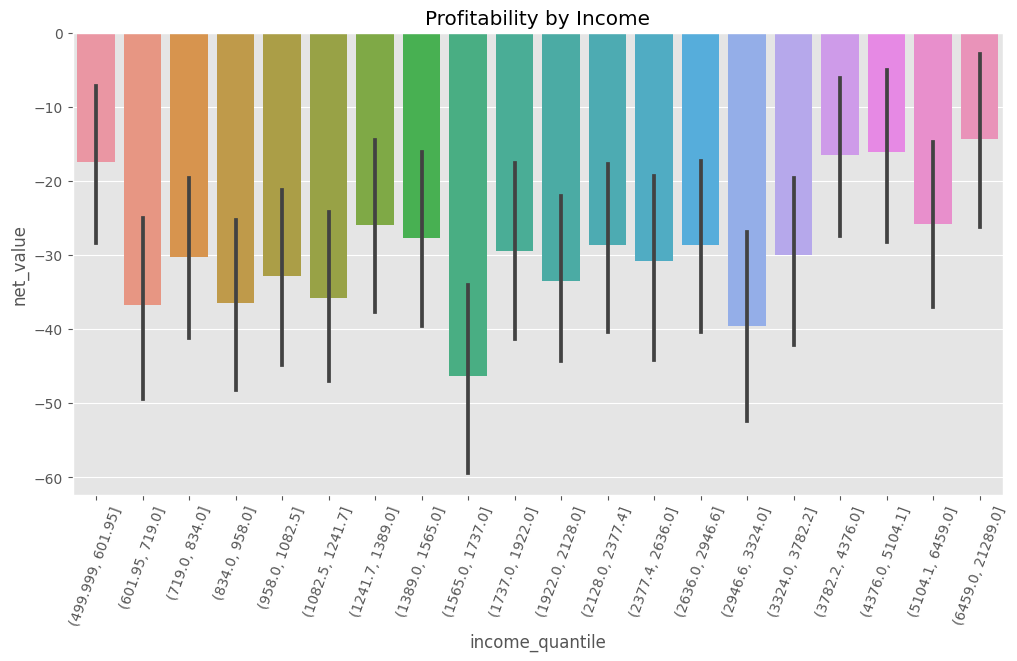

In [8]:
plt.figure(figsize=(12,6))
np.random.seed(123) ## seed because the CIs from seaborn uses boostrap

# pd.qcut create quantiles of a column
sns.barplot(data=train.assign(income_quantile=pd.qcut(train["income"], q=20)), 
            x="income_quantile", y="net_value")
plt.title("Profitability by Income")
plt.xticks(rotation=70);

흠. 그러나 슬프게도 아니네요. 또 아니지만 모든 수입 분위는 음수의 평균 `net_value`를 가지네요. 부유한 고객이 상대적으로 덜 부유한 고객보다 "덜 나쁜 것"은 사실이지만 여전히 평균적으로 마이너스 `net_value`를 창출하네요. 그러니까 '수입' 피처 하나는 우리에게 큰 도움이 되지 않았네요. 그래도 '지역(region)'과 같은 다른 변수는 어떨까요? 예를 들어 우리의 비용 대부분이 먼 곳의 고객에게 투입된다면 지역이라는 변수가 수익성 없는 고객과 있는 고객을 구분할 수도 있다고 예상해야겠죠. 

'지역' 변수가 이미 범주형(categorical variable) 변수이므로 여기서는 굳이 분위를 나눌 필요는 없겠네요. 지역마다 평균 `net_value`가 어떤지 봅시다. 

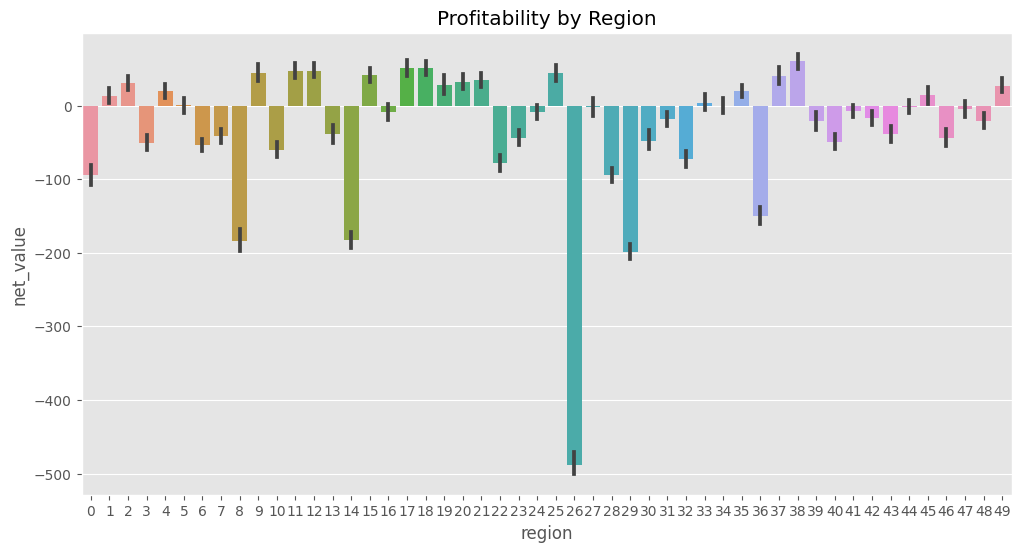

In [9]:
plt.figure(figsize=(12,6))
np.random.seed(123)
region_plot = sns.barplot(data=train, x="region", y="net_value")
plt.title("Profitability by Region");

오! 명백하게 몇몇 지역이 수익성이 있다고 확인할 수 있네요. 2, 17, 39 지역은 수익성이 있고, 0, 9, 29 지역은 수익성이 없네요. 그리고 26 지역은 아주 나쁘군요. 오 이건 좀 해볼만하네요. 우리는 이걸 정책으로 전환해볼 수 있겠어요. *위 데이터를 기반으로 수익성이 있다고 판명난 지역* 에만 비즈니스를 해보자.

주목할만한 점은 우리가 하는 일이 바로 ML이 해야하는 일이지만, 훨씬 더 간단하다는 것이죠. 우리는 지금 각 지역의 예상 `net_value`를 측정하고 있습니다. $E[NetValue|Region]$ 이제 우리는 이걸 가지고 뭔가를 해봐야겠죠.

정책을 만들기 위해서, 우리는 간단한 걸 해볼겁니다. 각 지역의 예상 `net_value`에 95% 신뢰 수준(CI; confidence interval)을 만들어볼건데요. 0보다 크다면, 이 지역에서 비즈니스를 해보는 겁니다. 

아래 코드는 키(key) 값이 지역이고 value 값이 95% 신뢰 수준의 하한 값으로 설정한 하나의 딕셔너리(dictionary)를 선언합니다. 그리고 나서, 이 딕셔너리는 `net_value`가 양수일꺼라 예상되는 지역만 필터를 걸게 되는데요. 이 결과가 바로 우리가 비즈니스를 해야할 지역인 것이죠.

In [10]:
# extract the lower bound of the 95% CI from the plot above
regions_to_net = train.groupby('region')['net_value'].agg(['mean', 'count', 'std'])

regions_to_net = regions_to_net.assign(
    lower_bound=regions_to_net['mean'] - 1.96*regions_to_net['std']/(regions_to_net['count']**0.5)
)

regions_to_net_lower_bound = regions_to_net['lower_bound'].to_dict()
regions_to_net = regions_to_net['mean'].to_dict()

# filters regions where the net value lower bound is > 0.
regions_to_invest = {region: net 
                     for region, net in regions_to_net_lower_bound.items()
                     if net > 0}

regions_to_invest

{1: 2.9729729729729737,
 2: 20.543302704837856,
 4: 10.051075065003388,
 9: 32.08862469914759,
 11: 37.434210420891255,
 12: 37.44213667009523,
 15: 32.09847683044394,
 17: 39.52753893574483,
 18: 41.86162250217046,
 19: 15.62406327716401,
 20: 22.06654814414531,
 21: 24.621030401718578,
 25: 33.97022928360584,
 35: 11.68776141117673,
 37: 27.83183541449011,
 38: 49.740709395699994,
 45: 2.286387928016998,
 49: 17.01853709535029}

`regions_to_invest`에는 우리가 비즈니스를 수행할 모든 지역이 있습니다. 이제 테스트 셋에서 이 정책이 어떻게 수행되는지 확인해볼까요. 이것이 바로 우리가 설정한 정책을 평가하는 핵심입니다. 훈련 셋의 한 지역이 우연히 수익성이 있어보이는 것처럼 나올 수도 있기 때문이죠. 만약 어떤 지역이 우연에 의해 수익성이 있다고 판단된 것이라면, 아마 테스트셋에서는 동일한 패턴이 나타나지 않겠죠. 

이를 위해 테스트 셋에 훈련 셋에 기반해 수익성이 있다고 판단된 지역들의 고객만 포함시켜보겠습니다. 그러고 나서, 그 고객들의 `net_value` 분포 막대 그래프를 그려보고 평균치도 나타내보겠습니다.

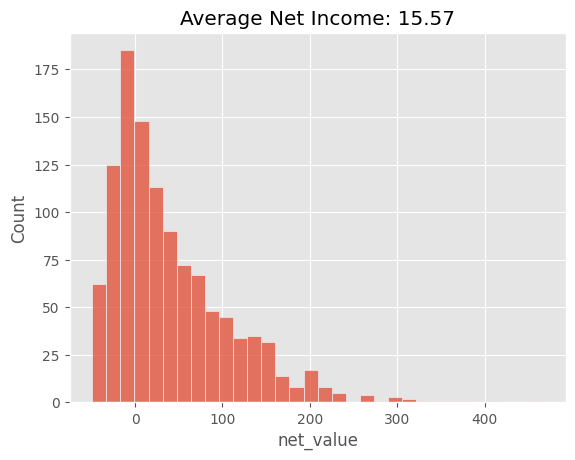

In [11]:
region_policy = (test[test["region"]
                      # filter regions in regions_to_invest
                      .isin(regions_to_invest.keys())]) 

sns.histplot(data=region_policy, x="net_value")
# average has to be over all customers, not just the one we've filtered with the policy
plt.title("Average Net Income: %.2f" % (region_policy["net_value"].sum() / test.shape[0]));

## Machine Learning Models as Policy Inputs

이제 우리가 더 잘하고 싶다면 머신러닝의 힘을 사용할 수 있습니다. 머신러닝은 전체 과정에 복잡성을 더할 것이며, 보통은 약간의 이득만 얻을 수 있음을 잊지 말아야 합니다. 하지만 상황에 따라 이런 미미한 이익이 막대한 돈이 될 수 있기 때문에 오늘날 머신러닝이 그렇게 가치가 있는 것이겠죠.

자, 저는 Gradient Boosting model을 사용할 건데요. 설명하기엔 좀 복잡한데, 사용하긴 쉽습니다. 우리는 목적이 명확하기 때문에 모델의 세부 작동 방식에 대한 정보가 필요하진 않죠. 이것만 기억하세요. 머신러닝(ML) 모델은 몇 가지 복잡한 매개변수가 있는 강력한 예측 머신이라는 것을요. 이건 $E[Y|X]$을 추정하기 위한 하나의 툴일 뿐입니다. 모델이 복잡할수록 더 강력한 성능을 자랑하지만, 너무 심하게 복잡해진다면 모델이 오버피팅될 우려도 있고 노이지 또한 학습하기 때문에 우리가 가지고 있지 않은 데이터에 테스트할 때 잘 일반화되지 않죠. 따라서 우리는 교차 유효성 검사(cross validation)을 통해 모델의 복잡도가 올바른지 확인해야합니다.

이제 우리는 하나의 질문을 던져야 하는데요. 수익성 있는 고객을 알아내고 그들과 비즈니스를 하기 위한 간단한 '지역'기반 정책을 개선하기 위해 어떤 좋은 예측을 사용할 수 있을까요? 우리에겐 두 가지 주요 개선 사항이 있습니다. 우선, 좋은 고객과 나쁜 고객을 구별하기 위해 모든 피처들을 살펴보는 것이 번거롭다는 것이죠. 우리의 사례에선 우리는 나이, 수입, 지역이라는 3가지 피처만 있어서 그리 나쁘진 않지만, 만약 우리가 100개 이상의 피처를 가지고 있다고 생각해봅시다. 또한 [mutiple testing](https://en.wikipedia.org/wiki/Multiple_comparisons_problem), False Positive rates(* 흔히 Type1 에러라고 불리는 FPR)와 같은 이슈들도 있고요. 두 번째 이유론, 수익성 있는 고객을 판별하기 위해 하나 이상의 피처가 필요할 수도 있다는 것이죠. 우리의 예시에선, 지역 피처 이외에도 고객의 수익성에 영향을 주는 몇몇 정보가 있다고 가정합니다. 물론 수입 피처만 확인했을 땐 그다지 도움이 되지 않지만, 간신히 수익성이 없는 지역에서의 수입 변수는 어떨까요? 어쩌면 몇몇 지역에서 더 부유한 고객에게만 초점을 맞춘다면 약간의 이익을 더 얻을 수 있을지도 모르죠. 엄밀히 말하면 우리는 지금 $E[NetValue|Region, Income, Age]$ 가 `NetValue`를 예측하는데 $E[NetValue|Region]$ 보다 좋을 수도 있다는 겁니다. 이거 상당히 말이 되는데요. 지역 피처 이외의 다른 소득과 연령과 같은 정보를 이용한다면 net value를 더 잘 예측할 수도 있겠네요.

둘 이상의 피처를 활용하는 간단하지 않은 정책을 활용하는 것은 매우 복잡한 일인데요. 우리가 지금 살펴봐야 하는 조합은 피처의 수에 따라 기하급수적으로 증가하기 때문에 실제로 우리가 할 수 있는 것이 아닙니다. 대신, 우리가 할 수 있는 건 이러한 모든 피처들을 머신러닝 모델에 넣어 우리의 일을 대신해 이런 상호작용을 학습하게끔 하는 것이죠. 정확히 이것이 우리가 바로 다음에 할 일입니다.

이 모델의 목표는 `지역`, `소득`, `연령` 피처를 활용하여 `net_value`를 예측하는 것입니다. 이를 위해 범주형 피처(categorical)인 지역 변수를 연속형(numerical) 값으로 변환해줄 겁니다. 훈련 셋에서 각 지역의 평균 net_value를 지역 피처를 대신해서 구성하고요. 우리가 이 값들을 `regions_to_net` 딕셔너리에 이미 해두었던걸 기억하고 있나요? 우리는 `.replace()` 함수를 활용하여 이 딕셔너리를 파라미터로 전달할거에요. 이 작업을 반복할 예정이기 때문에 함수화를 해두었습니다. 학습을 용이하게 하기 위해 피처를 변환하는 작업을 우리는 피처 엔지니어링(feature engineering)이라고 부르곤 합니다.

In [12]:
def encode(df): 
    return df.replace({"region": regions_to_net})

자, 그 다음 우리는 [Sklearn](https://scikit-learn.org/stable/)이라 불리는 모델을 활용할겁니다. 모든 모델엔 표준 사용법이 있는데요. 첫째로, 복잡도 파라미터(complexity parameters)를 인스턴스화합니다. 이 모델에서는 estimators를 400으로, 최대 깊이는 4로 설정할겁니다. 모델이 깊어지고 estimators가 많아질수록 모델은 더 강력해집니다. 물론 너무 파워풀하게 놔둘 순 없죠. 훈련 데이터의 노이즈를 학습하여 오버피팅되게 놔둘 순 없으니까요. 다시 말하는데, 이런 파라미터(매개변수)가 수행하는 세부 정보를 굳이 알 필욘 없습니다. 그냥 이게 좋은 모델이라고 생각하면 됩니다. 하여튼 그러고 나서, 모델을 훈련하기 위해 `.fit()`이라는 함수를 호출하여 피처들 `X`와 예측하고자 하는 대상 변수(target) `net_value`를 집어 넣습니다.

In [27]:
model_params = {'n_estimators': 400,
                'max_depth': 4,
                'min_samples_split': 10,
                'learning_rate': 0.01,
                'loss': 'squared_error'}

features = ["region", "income", "age"]
target = "net_value"

np.random.seed(123)

reg = ensemble.GradientBoostingRegressor(**model_params)

# fit model on the training set
encoded_train = train[features].pipe(encode)
reg.fit(encoded_train, train[target]);

모델이 훈련되었네요. 그 다음 우리는 이게 잘 됐는지 확인해야 합니다. 이를 위해 테스트 셋에서 이 모델의 성능을 확인해 볼 수 있는데요. 엄청 많은 머신러닝 모델의 예측 성능을 평가하는 지표들이 있는데요. 여기선 $R^2$를 사용할 것입니다. 자세한 건 알 필요 없지만, `net_income`과 같은 연속형 변수를 예측하는 모델을 평가하는데 주로 R-square가 사용됩니다. 또한 R-square는 마이너스 무한대(예측이 평균보다 나쁘면 음수가 됨)에서 1.0까지 갈 수 있습니다. R-square($R^2$)를 통해 우리의 모델에 의해 `net_income`의 분산(variance)이 얼마나 설명되는지 알 수 있습니다.

In [28]:
train_pred = (encoded_train
              .assign(predictions=reg.predict(encoded_train[features])))

print("Train R2: ", r2_score(y_true=train[target], y_pred=train_pred["predictions"]))
print("Test R2: ", r2_score(y_true=test[target], y_pred=reg.predict(test[features].pipe(encode))))

Train R2:  0.7108790300152951
Test R2:  0.6938513063048141


이 경우 모델은 훈련 셋에서 `net_income`의 분산을 약 71% 설명하지만 테스트 셋에선 약 69%의 설명력을 가지네요. 이건 사실 예상된 결과입니다. 모델이 훈련 셋에만 접근할 수 있기 때문에 성능은 종종 과대평가되곤 하죠. 재미로 혹은 모델의 과대적합에 대해 배우고 싶다면, `'max_depth'`를 14로 변경하고 어떤 결과가 나오는지 한번 보세요. $R^2$값이 훈련 셋에선 하늘을 찍고 테스트 셋에선 낮아지는 걸 볼 수 있을 겁니다. (역자가 해보았습니다. 각각 약 92%, 약 63%가 나옵니다.) 이게 바로 오버피팅이죠.

그 다음으로 우리의 정책을 수립하기 위해 테스트 셋의 예측을 `prediction` 칼럼에 저장해둡니다. 이 일련의 예측 과정이 바로 이렇게 표현되죠. $E[NetValue|Age, Income, Region]$

In [20]:
model_policy = test.assign(prediction=reg.predict(test[features].pipe(encode)))
model_policy.head()

,customer_id,region,income,age,net_value,prediction
5952,5952,19,1983,23,21,47.734883
1783,1783,31,914,31,-46,-36.026935
4811,4811,33,1349,25,-19,22.553420
145,145,20,1840,26,55,48.306256
7146,7146,19,3032,34,-17,7.039414


우리가 위에서 `regions` 피처에서 했던 것처럼, 우리는 우리 모델의 예측에 의한 net_value의 평균을 제시할 수 있습니다. 모델이 연속형이고 범주형이 아니므로 우리는 먼저 이 모델을 나름 구체화시켜야합니다. pandas의 `pd.qcut`을 활용할 수 있겠네요. (후. 전 정말 이 함수를 사랑해요 진짜로.) 이를 활용하여 모델 예측값을 활용하여 데이터를 분위로 나눌 수 있겠어요. 50분위 수로 나눠봅시다. 왜냐하면 지역이 50개거든요. 아, 그리고 하나의 규약(a.k.a 관습)인데요. 이러한 모델 분위를 **모델 밴드** 라고 부르는 경향이 있습니다. 왜냐하면 이 그룹이 -10에서 200까지의 밴드 안에서 모델 예측치를 가지고 있다는 직관을 제공하기 때문이죠.

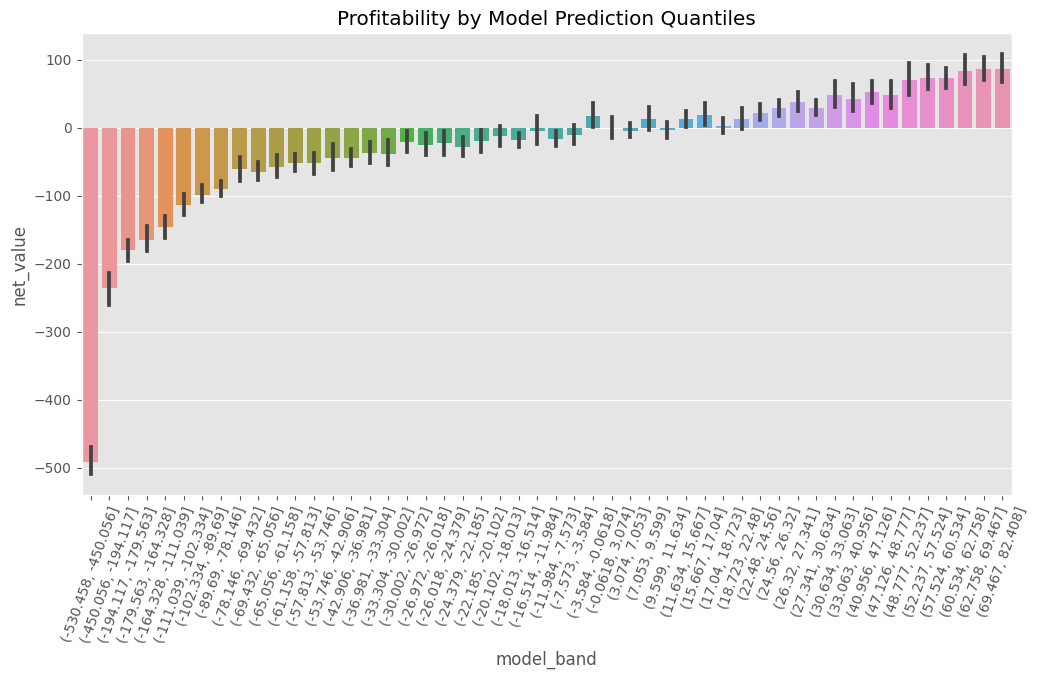

In [29]:
plt.figure(figsize=(12,6))

n_bands = 50
bands = [f"band_{b}" for b in range(1,n_bands+1)]

np.random.seed(123)
model_plot = sns.barplot(data=model_policy
                         .assign(model_band = pd.qcut(model_policy["prediction"], q=n_bands)),
                         x="model_band", y="net_value")
plt.title("Profitability by Model Prediction Quantiles")
plt.xticks(rotation=70);

자, net_value가 극 음수인 모델 밴드가 있는가 하면, 극 양수인 밴드도 있네요. 또한 이게 양수인지 음수인지 애매한 밴드도 있고요. 마지막으로 좌에서 우로 상향하는 추세가 있네요. 우리가 net_value를 예측하기 때문에, 예측치가 모델이 예측한 값과 비례하는 모습을 보이는 거라 예상할 수 있습니다. 

이제 이 머신러닝 모델을 활용하는 정책과 지역 피처만을 활용하는 정책을 비교하기 위해, 테스트 셋의 net_value를 히스토그램으로 그려주고, Net Income도 표현해 줄 수 있습니다. 

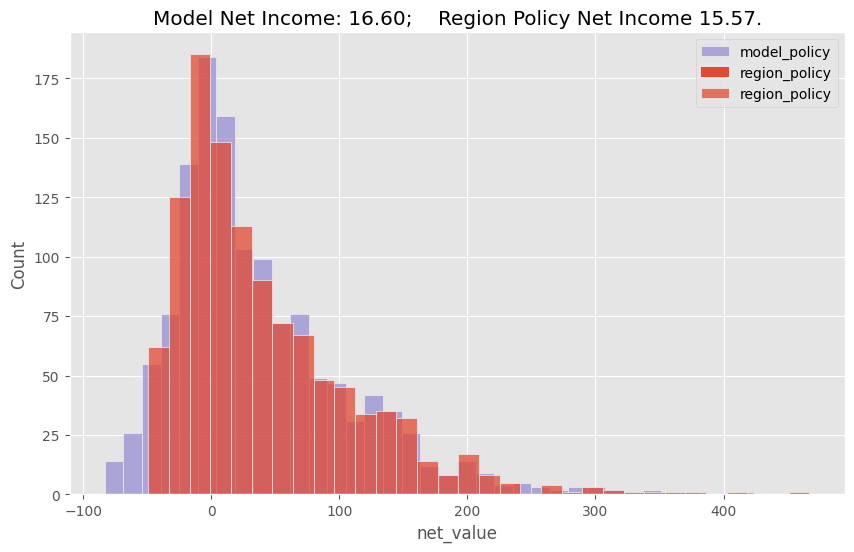

In [30]:
plt.figure(figsize=(10,6))
model_plot_df = (model_policy[model_policy["prediction"]>0])
sns.histplot(data=model_plot_df, x="net_value", color="C2", label="model_policy")

region_plot_df = (model_policy[model_policy["region"].isin(regions_to_invest.keys())])
sns.histplot(data=region_plot_df, x="net_value", label="region_policy")

plt.title("Model Net Income: %.2f;    Region Policy Net Income %.2f." % 
          (model_plot_df["net_value"].sum() / test.shape[0],
           region_plot_df["net_value"].sum() / test.shape[0]))
plt.legend();

보시다시피, 모델은 지역 단일 피처를 활용하는 것보다 더 낫지만 그렇다고 드라마틱하게 많이는 아니네요. 모델을 활용한 정책은 테스트 셋에서 고객당 16.6 reais을 창출하고 지역 단일 피처를 활용한 정책은 고객당 15.5 reais을 만들어냅니다. 이건 비록 작은 차이처럼 보이지만, 만약 우리에게 엄청 많은 고객들이 있다면 하나의 피처를 활용한 정책보단 모델을 활용한 정책이 낫다고 이미 정당화될 수 있는 것이죠.

## Fine Grain Policy

자, 다시 떠올려보자면, 지금까지 우리는 모든 고객들에게 비즈니스를 하는 가장 단순한 정책을 테스트했습니다. $\hat{E}[NetValue] > 0$와 같이 net_value를 추정해볼 수 있죠. 한 고객당 Net income이 마이너스였기 때문에 이는 작동하지 않았고, 우리는 지역(region) 피처를 기반으로 하는 단일 피처 정책을 생각해보았죠. (몇몇 지역에선 비즈니스를 하고, 몇몇 지역에서는 하지 않는) $\hat{E}[NetValue|Region] > 0$ 이 정책은 이미 우리에게 좋은 결과를 가져다 주었는데요. 이제 그 다음으로 우리는 모든 피처를 활용하는 머신러닝을 활용하여 예측 모델링을 했죠. $\hat{E}[NetValue|Region, Income, Age] > 0$ 그러고 나서, 이 모델을 정책에 대한 입력으로 활용하고, net income 예측이 0보다 큰 모든 고객에게 비즈니스를 하기로 했습니다.

여기서, 이 정책이 처리하는 결정은 아주 간단합니다. 고객과 관계를 맺거나, 맺지 않거나. 지금까지 우리가 다뤘던 정책들은 이분법적이었습니다. 아래와 같은 형태였죠.

```
if prediction > 0 then do business else don't do business.
```

이건 바로 우리가 **임계(thresholding)** 라고 부르는 것입니다. 만약 예측이 특정 threshold를 초과한다면(우리의 경우 0이지만 다른 것일 수도 있음), 우리는 어떤 결정을 내리고, 그렇지 않는다면 다른 결정을 하는 것이죠. 현실 세계에서 적용될 수 있는 또 다른 예시는 바로 사기 탐지(fraud detection)입니다. (사기를 탐지하는 모델의 예측 점수가 threshold `X`보다 크다면 거래를 거부하고, 그렇지 않다면 승인)

Thresholding 설정은 많은 실제 상황 시나리오에서 활용되고 특히 의사결정이 이분법적인 성격을 가진다면 아주 유용합니다. 그러나 상황이 더 미묘한 경우를 생각해볼 수 있는데요. 예를 들어 아주 수익성이 높은 고객들의 관심을 끌기 위해 마케팅에 더 많은 비용을 투자할 수 있습니다. 혹은 그 고객들에게 특별 대우를 하기 위해 그들을 어떤 프라임 고객 리스트에 올려두고 싶을 수 있습니다만 이 또한 비용이 많이 들죠. 이러한 가능성들을 포함한다면, 우리의 결정은 이분법(할 것인지 말 것인지)에서 연속형(고객에게 얼마를 투자해야하는지)으로 이동하게 되는 것이죠.

자, 다음 예시로 넘어가보자면 이제 누구와 비즈니스를 할 것인가가 아니라 각 고객에게 얼마만큼의 마케팅 비용을 투입해야하는지를 결정해야한다고 해봅시다. 그리고 예를 들어 다른 회사와 경쟁 관계에 있고, 특정 고객에 대해 더 많은 마케팅 비용을 투입하는 회사가 특정 고객을 얻는다고 가정해봅시다. (경매와 비슷하죠) 이런 경우에는 수익성이 높은 고객에게 더 많이 투자하고, 수익성이 덜한 고객에게 덜 투자하고, 수익성이 없는 고객에게 아예 투자하지 않는 것이 말이 되겠습니다.

이를 해보는 한 가지 방법은 예측을 밴드로 구분해보는 것입니다. 모델 비교를 위해 이전에 이미 이 작업을 해봤지만, 이번엔 의사 결정을 위해 해봅시다. 다시 20개의 밴드를 만들어볼까요? 이것을 분위수 혹은 동일한 사이즈의 그룹으로 생각할 수 있습니다. 첫 번째 밴드에는 *우리의 예측에 따라* 수익성이 5% 낮은 고객이 포함되고 두 번째 밴드에는 수익성이 5%에서 10% 낮은 고객이 포함됩니다. 마지막 밴드인 20은 가장 수익성이 높은 고객이 포함됩니다.

이러한 binning(* 일종의 그룹화) 또한 훈련 셋에서 추정하고, 테스트 셋에 적용되어야 함을 잊지 마세요. 이러한 이유에서 우리는 훈련 셋에서 `pd.qcut`을 활용하여 이 bins(* 일종의 그룹들)들을 계산해볼껀데요. 실제로 binning을 하기 위해, `np.digitize`를 활용하여 훈련 셋에 미리 훈련된 bin들을 전달합니다.

In [32]:
def model_binner(prediction_column, bins):
    # find the bins according to the training set
    bands = pd.qcut(prediction_column, q=bins, retbins=True)[1]
    
    def binner_function(prediction_column):
        return np.digitize(prediction_column, bands)
    
    return binner_function
    

# train the binning function
binner_fn = model_binner(train_pred["predictions"], 20)

# apply the binning
model_band = model_policy.assign(bands = binner_fn(model_policy["prediction"]))
model_band.head()

,customer_id,region,income,age,net_value,prediction,bands
5952,5952,19,1983,23,21,47.734883,18
1783,1783,31,914,31,-46,-36.026935,7
4811,4811,33,1349,25,-19,22.553420,15
145,145,20,1840,26,55,48.306256,18
7146,7146,19,3032,34,-17,7.039414,13


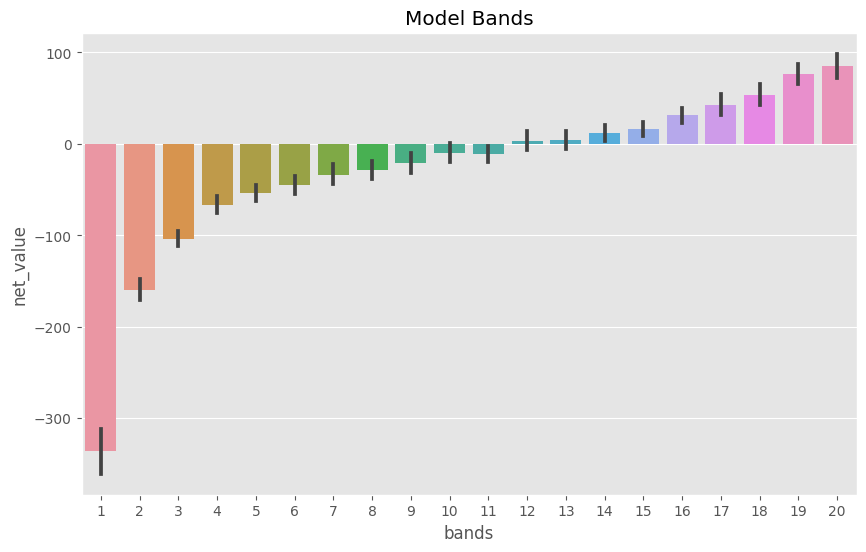

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data=model_band, x="bands", y="net_value")
plt.title("Model Bands");

우리는 이러한 밴드를 활용하여 대부분의 마케팅 비용 투자를 밴드 20과 19에 할당할 수 있습니다. 여기서 우리가 어떻게 이분법적 결정에서 연속형 결정으로 갔는지를 확인해보세요. (각 고객들에 대한 마케팅 비용을 어떻게 투입할지) 물론 더 많은 밴드를 추가하여 더 세밀하게 조정할 수 있는데요.  하지만 그렇게 하는 것보다 대신 모델의 raw 예측을 활용하고, 아래와 같은 규칙을 만들어 볼 수 있겠습니다.

In [ ]:
mkt_investments_i = model_prediction_i * 0.3

각각의 고객 $i$마다 모델에서 예측한 net_value의 30%를 투자합니다. (30%는 임의의 숫자지만, 결정은 할 수 있죠.)

## Key Ideas

와 정말 짧은 시간에 많은 부분을 다뤄보았습니다. 따라서 요약이 아주 중요하겠어요! 첫 번째로, 우리는 대부분의 머신러닝 모델 적용이 좋은 예측을 하는 것 이상을 포함하지 않는다는 것을 배웠습니다. 여기서 예측은 주어진 입력에서 초반에는 알지 못했던, 하지만 잘 정의된 출력으로 맵핑되는 것을 의미합니다. 또한 우리는 예측을 기대 함수 $E[Y|X]$ 로 측정하는 것으로 이해했습니다. 하지만 "더이상 없다"고 할 때, 완전히 합리적이진 않았습니다. 우리는 번역기와 자율주행 차와 같이 처음에 인지했던 것보다 많은 문제를 예측이 해결할 수 있다는 것을 확인했습니다. 

그리고 우리는 다시 처음으로 돌아와 어떤 고객을 모객해야하고 어떤 고객을 피해야하는지 등과 같은 공통 태스크를 어떻게 좋은 예측을 통해 수행할 수 있는지 알았습니다. 특히 고객의 이익을 어떻게 예측할 수 있는지 해보았는데요. 이 예측을 통해 우리는 비즈니스에서 누구를 대상으로 해야하는 지에 대한 정책을 세울 수 있었습니다. 다만 이는 예측 모델을 적용할 수 있는 단순 예시일 뿐이고, 신용 카드 계약, 사기 탐지, 암 진단 등과 같은 많은 곳에서 좋은 예측이 유용할 수 있겠죠!

반드시 유념해야할 점은 **비즈니스의 문제를 예측의 문제로 구성할 수만 있다면, 머신러닝은 아주 적합한 툴이 될 수 있다는 것** 입니다. 이걸 강조를 안할 수가 없네요. 머신러닝에 대한 여러 과장된 사실들 때문에, 종종 사람들은 이 중요한 점을 잊고 종국엔 쓸데 없는 것을 아주 훌룡하게 예측하는 모델을 만들곤 하죠. 비즈니스 문제를 예측 문제로 구성하고 머신러닝을 활용하여 해결하는 방법을 생각하는 대신, 예측 모델링을 먼저 구축하고 해당 모델에서 어떤 비즈니스 문제가 해결될지를 확인하려고 하는 것이죠. 이건 뭐 효과가 있을 수도 있겠지만 대부분의 경우 문제를 찾기 위한 솔루션만 만드는 허공의 삽질일 뿐이죠.

## References

여기 작성한 대부분의 것들은 제 머릿 속에서 나온 것입니다. 일련의 경험들을 통해 이 자료들의 기반 내용을 배우게 되었습니다. 이는 제가 제시할 수 있는 명확한 레퍼런스가 없다는 말인데요. 또한 여기 작성되어 있는 내용들이 좋은 연구들이 종종 경험하는 학문적 검증을 통과하지 않았을수도 있다는 것이죠. 대신, 이 작업들이 어떻게 실무에서 적용되는지 확인해주시기 바랍니다. 다만 왜 이게 이렇게 되는지에 대한 자세한 설명을 하는데 많은 시간을 쏟진 않았습니다. 일종의 경험론적인 과학인 것이죠. 그러나 이 자료들이 공개되어 있기 때문에 만약 잘못된 부분을 발견하신다면, 이슈를 발생하시면 최선을 다해 검토해보도록 하겠습니다.

마지막으로 머신러닝에 대해 포괄적이면서도 자세한 소개를 바랐다면 위 내용은 비교적 빨랐을 것 같다는 생각이 듭니다. 솔직히 말하면, 제가 사실 진정으로 잘 가르칠 수 있는 분야는 머신러닝보다는 인과추론 분야인 것 같습니다. 머신러닝의 경우 제가 만든 것보다 정말 훌룡하고도 많은 온라인 소스들이 있습니다. 가장 클래식한 것은 [Andrew Ng’s course on Machine Learning](https://www.coursera.org/learn/machine-learning) 이 자료입니다. 만약 여러분이 머신러닝 뉴비라면 이 자료를 공부하기를 추찬합니다.

## Contribute

Causal Inference for the Brave and True는 인과추론, 통계학에 대한 오픈소스 자료입니다. 이 자료는 금전적으로나 모든 분들이 쉽게 접근하실 수 있도록 하는 것이 목표입니다. 또한, 이 책은 Python 기반의 무료 소프트웨어만 사용해요.
여러분들께서 이 자료가 가치 있다고 생각하시고, 금전적으로 지원을 원하신다면 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true)를 방문해주세요. 
만약 여러분이 금전적으로 기여하기가 쉽지 않으시다면, 오타 수정, 수정 제안, 이해하기 난해한 부분에 대한 피드백 제공 등을 통해 도움을 주실 수 있어요. 이 책의 Github 저장소 [이슈 페이지](https://github.com/CausalInferenceLab/Causal-Inference-with-Python/issues)를 방문해주세요. 마지막으로 이 자료가 여러분의 마음에 드셨다면 도움이 될 수 있는 다른 사람들과 공유해주시고, [한국어 번역 자료](https://github.com/CausalInferenceLab/Causal-Inference-with-Python/stargazers)와 [해당 번역본의 원서](https://github.com/matheusfacure/python-causality-handbook/stargazers)에 star 부탁드립니다!